In [1]:
import seaborn as sns
import os
import glob
import re
import pandas as pd
from matplotlib import pyplot as plt
os.getcwd()


'/home/owaismujtaba/projects/mind-voice'

In [2]:
# Global plot settings
plt.rcParams.update({
    "font.size": 14,         # increase general font size
    "axes.labelsize": 20,    # axis label font size
    "axes.titlesize": 18,    # title font size
    "xtick.labelsize": 18,   # x tick labels
    "ytick.labelsize": 18,   # y tick labels
    "figure.dpi": 600,       # high-resolution figure
})

In [3]:
def load_decoding_accuracies(results_dir):
    files = glob.glob(results_dir)
    records = []
    print(files)
    # Regex to pull out sub-XX and ses-XX
    filename_re = re.compile(r"sub-([0-9a-zA-Z]+)_ses-([0-9a-zA-Z]+)_.*_accuracy\.csv")

    for filepath in files:
        print(filepath)
        fname = os.path.basename(filepath)
        m = filename_re.match(fname)
        if not m:
            # skip files that don't match the naming convention
            continue

        subject_id, session_id = m.groups()

        # Read the CSV
        df = pd.read_csv(filepath)

        # Try to grab an 'accuracy' column, otherwise fall back to first cell
        if "accuracy" in df.columns:
            accuracy = df["accuracy"].iloc[0]
        else:
            accuracy = df.iloc[0, 0]

        records.append({
            "subject_id": subject_id,
            "session_id": session_id,
            "accuracy": float(accuracy)
        })

    return records



In [4]:
results = load_decoding_accuracies("results/DecodingResults/*_accuracy.csv")

['results/DecodingResults/sub-02_ses-01_overt_covert_rest_accuracy.csv', 'results/DecodingResults/sub-01_ses-01_overt_covert_rest_accuracy.csv', 'results/DecodingResults/sub-04_ses-02_overt_covert_rest_accuracy.csv', 'results/DecodingResults/sub-10_ses-01_overt_covert_rest_accuracy.csv', 'results/DecodingResults/sub-12_ses-02_overt_covert_rest_accuracy.csv', 'results/DecodingResults/sub-13_ses-01_overt_covert_rest_accuracy.csv', 'results/DecodingResults/sub-06_ses-02_overt_covert_rest_accuracy.csv', 'results/DecodingResults/sub-08_ses-01_overt_covert_rest_accuracy.csv', 'results/DecodingResults/sub-09_ses-02_overt_covert_rest_accuracy.csv', 'results/DecodingResults/sub-15_ses-01_overt_covert_rest_accuracy.csv', 'results/DecodingResults/sub-13_ses-02_overt_covert_rest_accuracy.csv', 'results/DecodingResults/sub-09_ses-01_overt_covert_rest_accuracy.csv', 'results/DecodingResults/sub-07_ses-01_overt_covert_rest_accuracy.csv', 'results/DecodingResults/sub-14_ses-01_overt_covert_rest_accura

In [5]:
results = pd.DataFrame(results)
results

,subject_id,session_id,accuracy
0,02,01,0.797386
1,01,01,0.836601
2,04,02,0.898693
3,10,01,0.872549
4,12,02,0.885621
5,13,01,0.888889
6,06,02,0.856209
7,08,01,0.918301
8,09,02,0.918301
9,15,01,0.892157


In [6]:
df = results.groupby('subject_id')['accuracy'].mean().reset_index()
df.describe()

,accuracy
count,15.000000
mean,0.827084
std,0.144605
min,0.349673
25%,0.841503
50%,0.872549
75%,0.901144
max,0.924837


In [7]:
df

,subject_id,accuracy
0,01,0.836601
1,02,0.797386
2,03,0.924837
3,04,0.898693
4,05,0.846405
5,06,0.851307
6,07,0.689542
7,08,0.918301
8,09,0.903595
9,10,0.872549


In [7]:


def plot_accuracy_per_subject(df):
    """
    Plots the mean validation accuracy per subject with enhanced aesthetics.

    Parameters:
    - df (pd.DataFrame): DataFrame containing 'subject_id' and 'accuracy'.
    """
    # Compute mean accuracy per subject and sort
    subject_acc = df.groupby('subject_id')['accuracy'].mean().reset_index()
    subject_acc = subject_acc.sort_values('accuracy')

    plt.figure(figsize=(16, 8))
    palette = sns.color_palette("viridis", len(subject_acc))

    # Create barplot
    ax = sns.barplot(
        x='subject_id',
        y='accuracy',
        data=subject_acc,
        palette=palette,
        edgecolor='black',
        linewidth=1.5
    )

    # Set font sizes, labels, and make them bold
    ax.set_xlabel('Subject ID', fontsize=20, fontweight='bold', labelpad=15)
    ax.set_ylabel('Validation Accuracy', fontsize=20, fontweight='bold', labelpad=15)

    # Set tick sizes and make ticks bold
    ax.tick_params(axis='x', labelsize=18)
    ax.tick_params(axis='y', labelsize=18)
    for label in ax.get_xticklabels():
        label.set_fontweight('bold')
    for label in ax.get_yticklabels():
        label.set_fontweight('bold')

    # Remove top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Add horizontal gridlines
    ax.yaxis.grid(True, linestyle='--', linewidth=0.7)
    ax.set_axisbelow(True)

    # Annotate bars with accuracy values
    for p in ax.patches:
        height = p.get_height()
        ax.text(
            p.get_x() + p.get_width() / 2., 
            height + 0.005,  # small offset above bar
            f'{height:.3f}', 
            ha='center', 
            va='bottom',
            fontsize=14,
            fontweight='bold'
        )

    # Tight layout, save, and show
    plt.tight_layout()
    plt.savefig('results/images/overt_covert_rest_accuracy.png', dpi=800)
    plt.show()


/tmp/ipykernel_341654/935024646.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


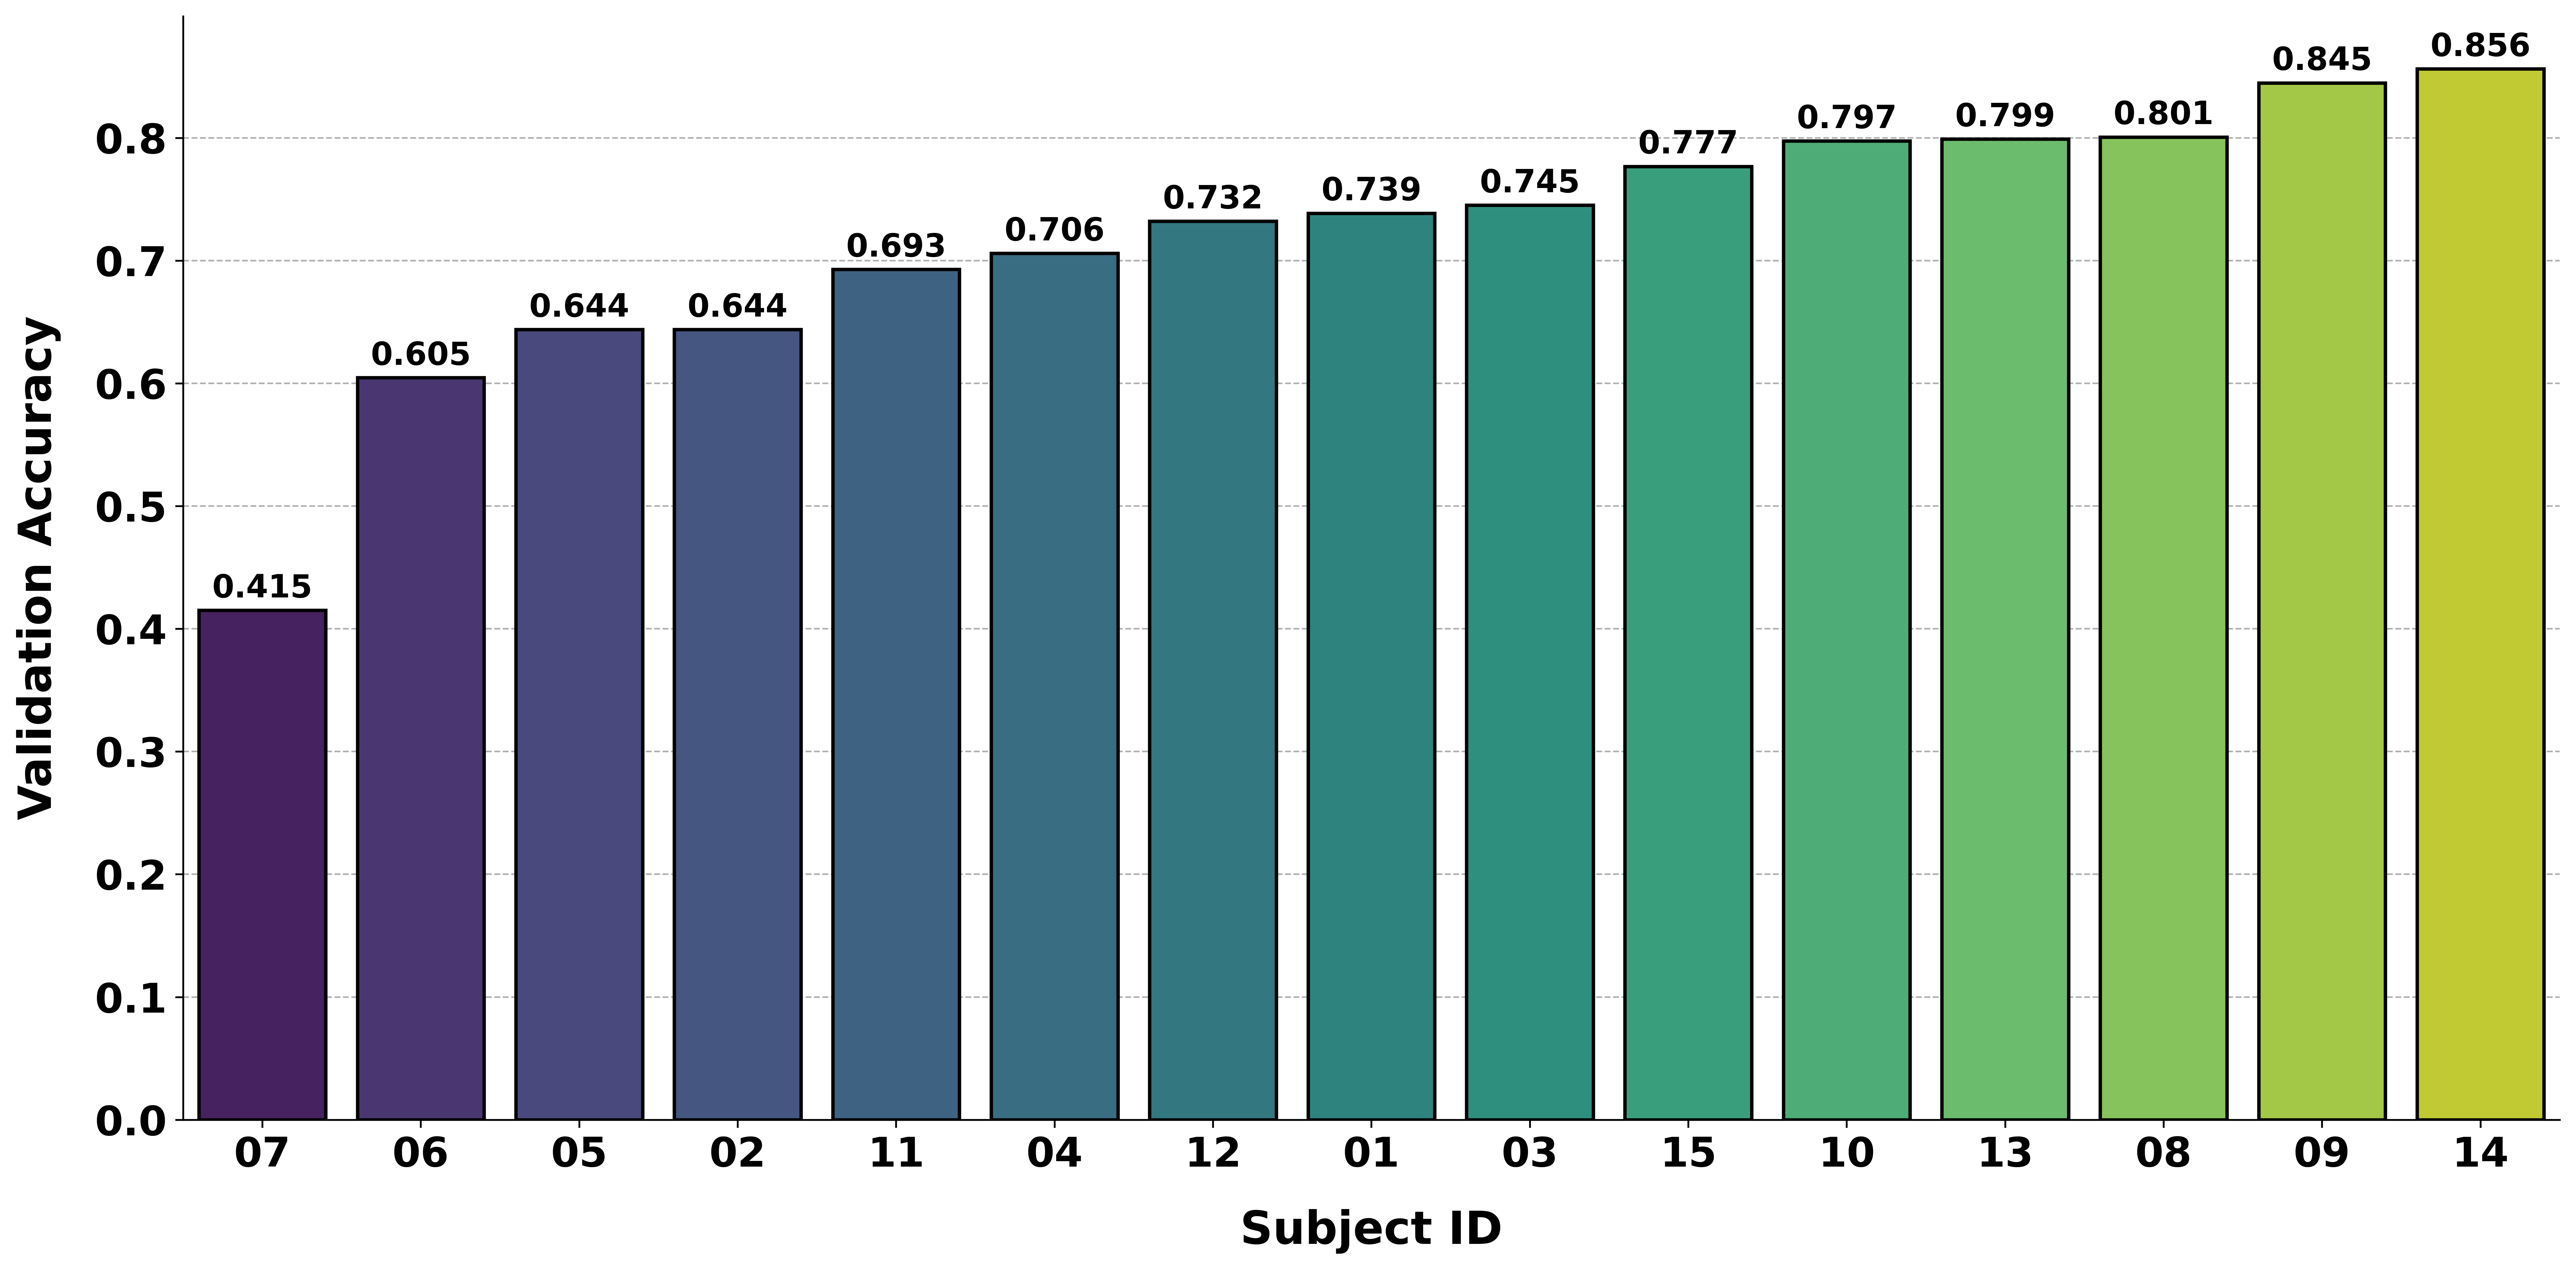

In [8]:
plot_accuracy_per_subject(results)

In [8]:
results.describe()

,accuracy
count,22.000000
mean,0.844271
std,0.122289
min,0.349673
25%,0.847222
50%,0.872549
75%,0.897059
max,0.936709


In [9]:
from scipy.stats import wilcoxon


In [10]:
groupA = df['accuracy']
groupB = [33.33 for x in range(len(groupA))]
groupA, groupB

(0     0.836601
 1     0.797386
 2     0.924837
 3     0.898693
 4     0.846405
 5     0.851307
 6     0.689542
 7     0.918301
 8     0.903595
 9     0.872549
 10    0.349673
 11    0.877451
 12    0.875817
 13    0.849673
 14    0.914433
 Name: accuracy, dtype: float64,
 [33.33,
  33.33,
  33.33,
  33.33,
  33.33,
  33.33,
  33.33,
  33.33,
  33.33,
  33.33,
  33.33,
  33.33,
  33.33,
  33.33,
  33.33])

In [11]:
stat, p = wilcoxon(groupA, groupB)

In [12]:
stat, p

(np.float64(0.0), np.float64(6.103515625e-05))

In [14]:
p

np.float64(0.0006533107814151376)

In [15]:
import mne

In [16]:
data = mne.io.read_raw_edf('BIDS/sub-01/ses-01/eeg/sub-01_ses-01_task-VCV_run-01_eeg.edf')

Extracting EDF parameters from /home/owaismujtaba/projects/mind-voice/BIDS/sub-01/ses-01/eeg/sub-01_ses-01_task-VCV_run-01_eeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


In [17]:
data

<RawEDF | sub-01_ses-01_task-VCV_run-01_eeg.edf, 64 x 6307000 (6307.0 s), ~65 KiB, data not loaded>